# Dates and time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##  pd.to_datetime()

In [5]:
pd.to_datetime('23rd Apr 90')

Timestamp('1990-04-23 00:00:00')

In [9]:
pd.to_datetime(10/11/12)
# By default, pandas convert 10 to month, 11 to day, 12 to year.
# Its not showing corrent time as my clock is not synched.
# It shows Timestamp(2012-10-11)

Timestamp('1970-01-01 00:00:00')

## dayfirst | yearfirst

In [8]:
# We can set which one to consider day/year
pd.to_datetime('10/11/12',dayfirst=True)

Timestamp('2012-11-10 00:00:00')

In [10]:
pd.to_datetime('10/11/12',yearfirst=True)

Timestamp('2010-11-12 00:00:00')

In [11]:
pd.to_datetime('10/11/12 4:45pm')

Timestamp('2012-10-11 16:45:00')

In [12]:
pd.to_datetime('5:36pm 10/11/12')

Timestamp('2012-10-11 17:36:00')

In [13]:
dt = ['3:35pm 10-11-12','4:45pm 21-10-19']
pd.to_datetime(dt)

DatetimeIndex(['2012-10-11 15:35:00', '2019-10-21 16:45:00'], dtype='datetime64[ns]', freq=None)

## format

In [14]:
pd.to_datetime("10/11/12")

Timestamp('2012-10-11 00:00:00')

In [15]:
# but after using codes, we an set dates with more control
pd.to_datetime("10/11/12",format="%d/%m/%y")

Timestamp('2012-11-10 00:00:00')

## Dates with string

In [26]:
holidays = ["Dec 31 1996 Meeting", "Aug 15 1947 Meeting", "Apr 17 1857 Meeting"]

In [28]:
pd.to_datetime(holidays,format="%b %d %Y Meeting")

DatetimeIndex(['1996-12-31', '1947-08-15', '1857-04-17'], dtype='datetime64[ns]', freq=None)

## Dates and Dataframes

In [30]:
ufo = pd.read_csv("nuforc_reports.csv")

In [31]:
pd.to_datetime(ufo["date_time"])
# This prints a series with changed data type.
# This is a temporary change.

0       2019-12-12 18:43:00
1       2019-03-22 18:30:00
2                       NaT
3       2019-04-17 02:00:00
4       2009-03-15 18:00:00
                ...        
88120   2019-10-02 20:00:00
88121   2019-10-02 20:00:00
88122   2019-10-02 20:03:00
88123   2019-10-02 22:00:00
88124   2019-10-02 22:00:00
Name: date_time, Length: 88125, dtype: datetime64[ns]

In [32]:
# Create a new column 'date'
ufo["date"] = pd.to_datetime(ufo["date_time"])

In [34]:
ufo.head()

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582,2019-12-12 18:43:00
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300,2019-03-22 18:30:00
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaN,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaN,NaN,NaN,NaT
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17T02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501,2019-04-17 02:00:00
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15T18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18T00:00:00,NaN,NaN,2009-03-15 18:00:00


In [35]:
ufo = pd.read_csv("nuforc_reports.csv",parse_dates=["date_time"])
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88095 non-null  object        
 1   city            87891 non-null  object        
 2   state           82890 non-null  object        
 3   date_time       86938 non-null  datetime64[ns]
 4   shape           85627 non-null  object        
 5   duration        84954 non-null  object        
 6   stats           88088 non-null  object        
 7   report_link     88125 non-null  object        
 8   text            88070 non-null  object        
 9   posted          86938 non-null  object        
 10  city_latitude   72013 non-null  float64       
 11  city_longitude  72013 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 8.1+ MB


## Useful .dt properties

In [37]:
ufo["date_time"].dt.year.value_counts().head()

2014.0    8704
2012.0    8124
2013.0    7823
2015.0    6915
2019.0    5767
Name: date_time, dtype: int64

<Axes: >

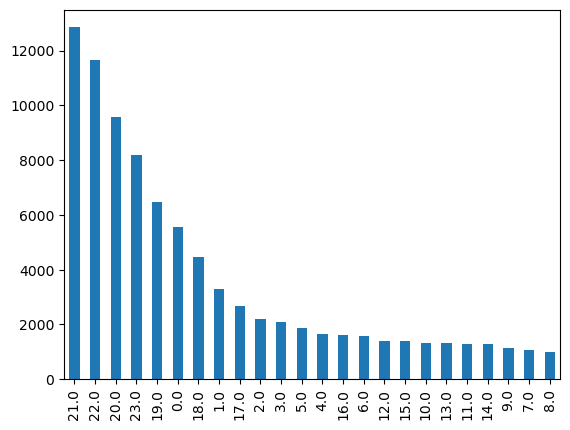

In [38]:
# We an use this to plot data
ufo["date_time"].dt.hour.value_counts().plot(kind="bar")

## Comparing Dates

In [40]:
# We can filter data
ufo["date_time"] > "1980"

0         True
1         True
2        False
3         True
4         True
         ...  
88120     True
88121     True
88122     True
88123     True
88124     True
Name: date_time, Length: 88125, dtype: bool

In [41]:
# Then print the filtered dataframe
ufo[ufo["date_time"] > "1980"]

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17 02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15 18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18T00:00:00,NaN,NaN
5,"The object has flashing lights that are green,...",Kirbyville,TX,2019-04-02 20:25:00,disk,15 minutes,Occurred : 4/2/2019 20:25 (Entered as : 04/02...,http://www.nuforc.org/webreports/145/S145476.html,"The object has flashing lights that are green,...",2019-04-08T00:00:00,30.677200,-94.005200
...,...,...,...,...,...,...,...,...,...,...,...,...
88120,4 lights in formation over Tempe appear while ...,Tempe,AZ,2019-10-02 20:00:00,formation,3 minutes,Occurred : 10/2/2019 20:00 (Entered as : 10/2...,http://www.nuforc.org/webreports/149/S149463.html,4 lights in formation over Tempe appear while ...,2019-10-04T00:00:00,33.414036,-111.920920
88121,"2 bright star like lights in the NNW skys, ((...",Bolivar,MO,2019-10-02 20:00:00,light,20 seconds,Occurred : 10/2/2019 20:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149405.html,2 bright star like lights in the NNW sky two b...,2019-10-04T00:00:00,37.642200,-93.399600
88122,I just witnessed a ‘Phoenix Lights’ type of fo...,North Port,FL,2019-10-02 20:03:00,formation,20 seconds,Occurred : 10/2/2019 20:03 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149424.html,10/2/19 @ 8:03PM EST UFO SIGHTING in the 3428...,2019-10-04T00:00:00,27.076210,-82.223280
88123,"Witnessed an orange, slow moving light. Was lo...",Black Mountain,NC,2019-10-02 22:00:00,fireball,2 minutes,Occurred : 10/2/2019 22:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149447.html,"Witnessed an orange, slow moving light. Was lo...",2019-10-04T00:00:00,35.605000,-82.313200


## Filter dates between

In [42]:
ufo["date_time"].between("1990","1998").sort_values()
# This prints data from 1990 but not 1991, it's exclusive

0        False
58628    False
58627    False
58626    False
58625    False
         ...  
8456      True
8457      True
84612     True
8451      True
49385     True
Name: date_time, Length: 88125, dtype: bool

## Date Math and Time Delta

In [45]:
ufo["posted"] = pd.to_datetime(ufo["posted"])

In [46]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88095 non-null  object        
 1   city            87891 non-null  object        
 2   state           82890 non-null  object        
 3   date_time       86938 non-null  datetime64[ns]
 4   shape           85627 non-null  object        
 5   duration        84954 non-null  object        
 6   stats           88088 non-null  object        
 7   report_link     88125 non-null  object        
 8   text            88070 non-null  object        
 9   posted          86938 non-null  datetime64[ns]
 10  city_latitude   72013 non-null  float64       
 11  city_longitude  72013 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 8.1+ MB


In [47]:
# timedelta is a datatype that is the result of the two time differences.
ufo["reporting_time_diff"] = ufo["posted"] - ufo["date_time"]

In [48]:
ufo.head()

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,reporting_time_diff
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22,37.343152,-77.408582,9 days 05:17:00
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29,41.664800,-72.639300,6 days 05:30:00
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaT,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaT,NaN,NaN,NaT
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17 02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18,45.381383,-75.708501,0 days 22:00:00
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15 18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18,NaN,NaN,3685 days 06:00:00


Q.Calculate longest time interval (years) b/w seeing and reporting

In [51]:
longest_wait = ufo.sort_values("reporting_time_diff",ascending=False).head()
longest_wait

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,reporting_time_diff
86762,An incomplete report given on behalf of anothe...,El Paso,TX,1969-06-01 00:00:00,other,3 minutes,Occurred : 6/1/1969 00:00 (Entered as : 1969 ...,http://www.nuforc.org/webreports/151/S151313.html,An incomplete report given on behalf of anothe...,2019-12-19,31.792328,-106.374849,18463 days 00:00:00
87145,Strange globe sighting--1969.,Philadelphia,PA,1969-07-04 01:30:00,sphere,20 minutes,Occurred : 7/4/1969 01:30 (Entered as : 07/04...,http://www.nuforc.org/webreports/149/S149273.html,Strange globe sighting--1969. Thank you for al...,2019-10-04,39.990635,-75.145801,18353 days 22:30:00
721,It was July 1969 on a clear summer evening in ...,New Castle,PA,1969-07-01 21:00:00,disk,45 seconds,Occurred : 7/1/1969 21:00 (Entered as : July ...,http://www.nuforc.org/webreports/147/S147922.html,It was July 1969 on a clear summer evening in ...,2019-08-23,41.001224,-80.319468,18314 days 03:00:00
1576,1969 olive branch Mississippi large round ligh...,Olive Branch,MS,1969-06-30 00:00:00,light,5 minutes,Occurred : 5/30/1969 20:30 (Entered as : Summ...,http://www.nuforc.org/webreports/147/S147576.html,1969 olive branch Mississippi large round ligh...,2019-07-25,34.918000,-89.821600,18287 days 00:00:00
1580,Six bright lights in &quot;V&quot; formation s...,Westport,MA,1969-08-15 16:00:00,formation,8-10 secs,Occurred : 8/15/1969 16:00 (Entered as : 08/1...,http://www.nuforc.org/webreports/147/S147589.html,Six bright lights in &quot;V&quot; formation s...,2019-07-25,NaN,NaN,18240 days 08:00:00


In [52]:
longest_wait["reporting_time_diff"].dt.days/365

86762    50.583562
87145    50.282192
721      50.175342
1576     50.101370
1580     49.972603
Name: reporting_time_diff, dtype: float64